Set Up Environment and Import Family Data

In [107]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.linear_model import ElasticNet, ElasticNetCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from abess import LinearRegression
from abess.decomposition import SparsePCA
from kennard_stone import train_test_split
from sklearn.pipeline import Pipeline
# from genetic_selection import GeneticSelectionCV
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'rdkit'

In [118]:
def extractDragonDescriptors(family_Y_df, descriptorFileString):
    family_X = pd.read_csv(descriptorFileString, sep='\t', index_col=0, low_memory=False)
    colsX = family_X.columns
    family_X_resetIndex = pd.DataFrame(family_X.to_numpy(), index=family_Y_df.index, columns=family_X.columns).replace('na', np.NaN)
    return family_X_resetIndex[colsX[1:]].dropna(axis=1, how='any')

In [109]:
triph_Y = pd.read_csv('Data/exactPLS/triphenylamines.csv', index_col=0)
porph_Y = pd.read_csv('Data/exactPLS/porphyrins.csv', index_col=0)
pheno_Y = pd.read_csv('Data/exactPLS/phenothiazines.csv', index_col=0)
indol_Y = pd.read_csv('Data/exactPLS/indolines.csv', index_col=0)
couma_Y = pd.read_csv('Data/exactPLS/coumarins.csv', index_col=0)
carba_Y = pd.read_csv('Data/exactPLS/carbazoles.csv', index_col=0)
diphe_Y = pd.read_csv('Data/exactPLS/diphenylamines.csv', index_col=0)

couma_Y.rename(columns = {'Molecule SMILES':'Molecule SMILE'}, inplace = True)


In [114]:
global_Y = pd.read_csv('Data/exactPLS/global.csv', index_col=0)

global_Y

,Molecule SMILE,PCE
S.No,,
1,CCCCCCC(Cc1cc(sc1c1cc2c(s1)c1sc(cc1c1c2non1)c1...,6.18
2,N#C/C(=C\c1ccc(cc1)/C=C/c1cccc(c1)N(c1ccccc1)c...,2.23
3,N#CC(=Cc1ccc(cc1)C=Cc1ccc(cc1)N(c1ccccc1)c1ccc...,4.12
4,N#CC(=Cc1cccc(c1)N(c1ccccc1)c1ccccc1)C(=O)O,1.27
5,N#CC(=Cc1ccc(cc1)N(c1ccccc1)c1ccccc1)C(=O)O,2.92
...,...,...
31,CCCCc1ccc(cc1)N(c1ccc2c(c1)Cc1c2ccc(c1)c1ccc(c...,4.62
32,CCCCCCCCN(c1ccccc1)c1ccc(cc1)C=C1C(=O)NC(=O)NC1=O,1.53
33,CCCCCCCCN(c1ccccc1)c1ccc(cc1)C=C1C(=O)NC(=S)NC1=O,0.44


In [94]:
triph_X = extractDragonDescriptors(triph_Y, 'Data/exactPLS/desc_triphenylamines.txt')
porph_X = extractDragonDescriptors(porph_Y, 'Data/exactPLS/desc_porphyrins.txt')
pheno_X = extractDragonDescriptors(pheno_Y, 'Data/exactPLS/desc_phenothiazines.txt')
indol_X = extractDragonDescriptors(indol_Y, 'Data/exactPLS/desc_indolines.txt')
couma_X = extractDragonDescriptors(couma_Y, 'Data/exactPLS/desc_coumarins.txt')
carba_X = extractDragonDescriptors(carba_Y, 'Data/exactPLS/desc_carbazoles.txt')
diphe_X = extractDragonDescriptors(diphe_Y, 'Data/exactPLS/desc_diphenylamines.txt')


In [121]:
global_X = extractDragonDescriptors(global_Y, 'Data/exactPLS/desc_global.txt')

global_X

,MW,AMW,Se,Sp,Si,Me,Mp,Mi,GD,nAT,...,TPSA(NO),TPSA(Tot),LOGP99,LOGPcons,ESOL,SAacc,SAdon,Vx,VvdwMG,SAscore
S.No,,,,,,,,,,,,,,,,,,,,,
1,1071.66,7.390759,142.8535,101.1033,161.0030,0.985197,0.697264,1.110366,0.029910,145,...,103.25,216.21,20.87618,17.683738,-16.178354,151.166029,42.683343,1393.538206,574.499265,5.619172
2,442.54,7.902500,55.6942,40.5344,61.5674,0.994539,0.723829,1.099418,0.065954,56,...,64.33,64.33,7.31838,6.551195,-6.828946,102.011940,42.683343,579.269103,240.782419,3.681863
3,442.54,7.902500,55.6942,40.5344,61.5674,0.994539,0.723829,1.099418,0.065954,56,...,64.33,64.33,7.31838,6.551195,-6.828946,102.011940,42.683343,579.269103,240.782419,3.744709
4,340.40,8.104762,42.0434,30.2502,46.3218,1.001033,0.720243,1.102900,0.086154,42,...,64.33,64.33,5.14798,4.715074,-5.136584,102.011940,42.683343,438.637874,183.146670,3.276183
5,340.40,8.104762,42.0434,30.2502,46.3218,1.001033,0.720243,1.102900,0.086154,42,...,64.33,64.33,5.14798,4.715074,-5.136584,102.011940,42.683343,438.637874,183.146670,3.359140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,616.85,7.090230,85.6466,60.3870,96.3042,0.984444,0.694103,1.106945,0.048104,87,...,64.33,64.33,11.07138,10.162685,-9.855025,102.011940,42.683343,833.172757,344.841294,4.329056
32,419.57,6.992833,59.7741,39.2788,67.5207,0.996235,0.654647,1.125345,0.070968,60,...,86.03,86.03,4.93460,5.149870,-5.295236,114.580596,36.021501,556.611296,231.496433,3.424933
33,435.64,7.260667,59.5232,40.4720,67.2313,0.992053,0.674533,1.120522,0.070968,60,...,68.96,101.05,5.09950,5.626522,-5.722453,89.435669,36.021501,574.019934,238.631120,3.502437


In [122]:

global_X.shape, global_Y.shape

((1147, 1023), (1147, 2))

In [6]:
triph_X.shape,porph_X.shape,pheno_X.shape,indol_X.shape,couma_X.shape,carba_X.shape,diphe_X.shape

((229, 851),
 (281, 723),
 (207, 673),
 (160, 554),
 (56, 630),
 (179, 603),
 (35, 481))

Divide Family Datasets Into Train and Test (0.3)

In [ ]:
pd.concat([global_X, global_Y], axis = 1).corr()['PCE'].abs().sort_values()

In [138]:
global_X_train_rmCorr = vWSP(global_X, threshold=0.7)

global_X_train_rmCorr

,MW,AMW,Me,Mp,Mi,nTA,RBF,nDB,nTB,nN,...,F10[S-F],F10[S-Cl],F10[S-Br],F10[S-Si],F10[S-X],F10[X-X],Hy,TPSA(NO),TPSA(Tot),SAdon
S.No,,,,,,,,,,,,,,,,,,,,,
1,1071.66,7.390759,0.985197,0.697264,1.110366,7,0.183007,2,1,4,...,0,0,0,0,0,0,-0.528483,103.25,216.21,42.683343
2,442.54,7.902500,0.994539,0.723829,1.099418,3,0.118644,3,1,2,...,0,0,0,0,0,0,-0.479507,64.33,64.33,42.683343
3,442.54,7.902500,0.994539,0.723829,1.099418,3,0.118644,3,1,2,...,0,0,0,0,0,0,-0.479507,64.33,64.33,42.683343
4,340.40,8.104762,1.001033,0.720243,1.102900,3,0.113636,2,1,2,...,0,0,0,0,0,0,-0.407756,64.33,64.33,42.683343
5,340.40,8.104762,1.001033,0.720243,1.102900,3,0.113636,2,1,2,...,0,0,0,0,0,0,-0.407756,64.33,64.33,42.683343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,616.85,7.090230,0.984444,0.694103,1.106945,5,0.130435,2,1,2,...,0,0,0,0,0,0,-0.548004,64.33,64.33,42.683343
32,419.57,6.992833,0.996235,0.654647,1.125345,4,0.161290,4,0,3,...,0,0,0,0,0,0,0.161038,86.03,86.03,36.021501
33,435.64,7.260667,0.992053,0.674533,1.120522,4,0.161290,4,0,3,...,0,0,0,0,0,0,0.161038,68.96,101.05,36.021501


In [128]:
pd.concat([global_X_train_rmCorr, global_Y], axis = 1).corr()['PCE'].abs().sort_values()

nArNHR         0.000045
B06[O-F]       0.000052
totalcharge    0.000216
B04[Br-X]      0.000360
F04[Br-X]      0.000360
                 ...   
Eta_epsi_A     0.356367
Eta_L_A        0.360554
MaxtsC         0.432035
mintsC         0.474240
PCE            1.000000
Name: PCE, Length: 867, dtype: float64

In [40]:
from kennard_stone import train_test_split

triph_X_train, triph_X_test, triph_Y_train, triph_Y_test = train_test_split(triph_X, triph_Y['PCE'], test_size=0.3)
porph_X_train, porph_X_test, porph_Y_train, porph_Y_test = train_test_split(porph_X, porph_Y['PCE'], test_size=0.3)
pheno_X_train, pheno_X_test, pheno_Y_train, pheno_Y_test = train_test_split(pheno_X, pheno_Y['PCE'], test_size=0.3)
indol_X_train, indol_X_test, indol_Y_train, indol_Y_test = train_test_split(indol_X, indol_Y['PCE'], test_size=0.3)
couma_X_train, couma_X_test, couma_Y_train, couma_Y_test = train_test_split(couma_X, couma_Y['PCE'], test_size=0.3)
carba_X_train, carba_X_test, carba_Y_train, carba_Y_test = train_test_split(carba_X, carba_Y['PCE'], test_size=0.3)
diphe_X_train, diphe_X_test, diphe_Y_train, diphe_Y_test = train_test_split(diphe_X, diphe_Y['PCE'], test_size=0.3)

In [139]:
global_X_train, global_X_test, global_Y_train, global_Y_test = train_test_split(global_X_train_rmCorr, global_Y['PCE'], test_size=0.3)

In [126]:
pd.concat([global_X, global_Y], axis = 1).corr()['PCE'].abs().sort_values(ascending=False).head(10)

PCE         1.000000
mintsC      0.474240
MaxtsC      0.432035
LOGPcons    0.405476
nCs         0.403580
C-002       0.403276
SssCH2      0.402945
nCsp3       0.397295
LOGP99      0.396008
H-046       0.395082
Name: PCE, dtype: float64

In [8]:
porph_X_train.shape, triph_X_train.shape, diphe_X_train.shape, porph_X_test.shape

((196, 723), (160, 851), (24, 481), (85, 723))

Remove Intercorrelated Descriptors

In [125]:
def returnNextRow(rowDf, to_drop):
    max = -200
    nextRow='None'
    for i in range(len(rowDf.columns)):
        if (rowDf[rowDf.columns[i]][0] > max) and (rowDf.columns[i] not in to_drop) and (rowDf[rowDf.columns[i]][0] != np.NaN):
            max = rowDf[rowDf.columns[i]][0]
            nextRow = rowDf.columns[i]
    return nextRow

def getTo_dropOfRow(rowDf, to_drop=[], threshold=0.95):
    for i in range(len(rowDf.columns)):
        if (rowDf[rowDf.columns[i]][0] > threshold) and (rowDf[rowDf.columns[i]][0] != np.NaN) and (rowDf.columns[i] not in to_drop):
            to_drop.append(rowDf.columns[i])
    return to_drop

def vWSPFeatureSelect(rowName,corr_matrix,to_drop=[],thresh=0.95):
    if rowName=='None':
        return to_drop
    else:
        to_DropThisRow = getTo_dropOfRow(corr_matrix.loc[[rowName]], to_drop, threshold=thresh) #array of column names
        nextRow = returnNextRow(corr_matrix.loc[[rowName]], to_DropThisRow)
        updateTo_drop = to_DropThisRow
        return vWSPFeatureSelect(rowName=nextRow, corr_matrix=corr_matrix,to_drop=updateTo_drop, thresh=0.95)
    
def vWSP(X_train, threshold=0.95):
    cor_matrix = X_train.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    to_drop=vWSPFeatureSelect('MW', corr_matrix=upper_tri, to_drop=[], thresh=threshold) #MW chosen as seed
    X_train_rm = X_train.drop(to_drop, axis=1)
    return X_train_rm

In [142]:
porph_X_train_rmCorr = vWSP(porph_X_train, threshold=0.95)
triph_X_train_rmCorr = vWSP(triph_X_train, threshold=0.95)
pheno_X_train_rmCorr = vWSP(pheno_X_train, threshold=0.95)
indol_X_train_rmCorr = vWSP(indol_X_train, threshold=0.95)
couma_X_train_rmCorr = vWSP(couma_X_train, threshold=0.95)
carba_X_train_rmCorr = vWSP(carba_X_train, threshold=0.95)
diphe_X_train_rmCorr = vWSP(diphe_X_train, threshold=0.95)

In [143]:
porph_X_train_rmCorr.shape, triph_X_train_rmCorr.shape, pheno_X_train_rmCorr.shape, indol_X_train_rmCorr.shape 

((196, 674), (160, 802), (144, 620), (112, 500))

Selecting From Linear Regression Directly

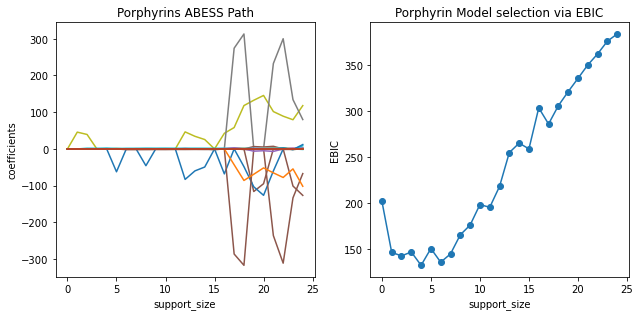

In [125]:
fig, axs = plt.subplots(1,2, figsize=(9, 4.5), tight_layout=True)

vis_porph_coef = np.zeros((25,674))
vis_porph_ic = np.zeros(25)

for s in range(25):
    vis_porph_linModel = LinearRegression(support_size=s)
    vis_porph_linModel.fit(np.array(porph_X_train_rmCorr), porph_Y_train)
    vis_porph_coef[s, :] = vis_porph_linModel.coef_
    vis_porph_ic[s] = vis_porph_linModel.ic_

for i in range(674):
    axs[0].plot(vis_porph_coef[:, i], label=i)

axs[0].set_xlabel('support_size')
axs[0].set_ylabel('coefficients')
axs[0].set_title('Porphyrins ABESS Path')

axs[1].plot(vis_porph_ic,'o-')
axs[1].set_xlabel('support_size')
axs[1].set_ylabel('EBIC')
axs[1].set_title('Porphyrin Model selection via EBIC')
plt.show()


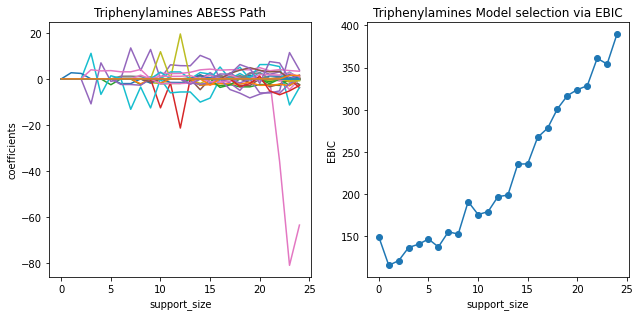

In [128]:
fig, axs = plt.subplots(1,2, figsize=(9, 4.5), tight_layout=True)

vis_triph_coef = np.zeros((25,802))
vis_triph_ic = np.zeros(25)

for s in range(25):
    vis_triph_linModel = LinearRegression(support_size=s)
    vis_triph_linModel.fit(np.array(triph_X_train_rmCorr), triph_Y_train)
    vis_triph_coef[s, :] = vis_triph_linModel.coef_
    vis_triph_ic[s] = vis_triph_linModel.ic_

for i in range(802):
    axs[0].plot(vis_triph_coef[:, i], label=i)

axs[0].set_xlabel('support_size')
axs[0].set_ylabel('coefficients')
axs[0].set_title('Triphenylamines ABESS Path')

axs[1].plot(vis_triph_ic,'o-')
axs[1].set_xlabel('support_size')
axs[1].set_ylabel('EBIC')
axs[1].set_title('Triphenylamines Model selection via EBIC')
plt.show()

Optimum Via Abess

In [203]:
def retrieveAbessFeatures(input_X_train, input_X_test, input_Y_train, input_Y_test, n_features=0):
    if n_features==0:
        linModel = LinearRegression(support_size=range(20), ic_type='aic')
    else:
        linModel = LinearRegression(support_size=n_features)
    
    scaled_X_train = scaleData(input_X_train)
    
    linModel.fit(np.array(scaled_X_train), input_Y_train)
    ind = np.nonzero(linModel.coef_)
    descriptorArray = input_X_train.columns[ind]
    
    plsModel = PLSRegression(n_components=2)
    plsModel.fit(input_X_train[descriptorArray], input_Y_train)
    predict_train = plsModel.predict(input_X_train[descriptorArray])
    predict_test = plsModel.predict(input_X_test[descriptorArray])
    r2_train = r2_score(input_Y_train, predict_train)
    r2_test = r2_score(input_Y_test, predict_test)
    
    return descriptorArray, r2_train, r2_test

def scaleData(train_X):
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(train_X)
    scaled_df = pd.DataFrame(scaled_array, index=train_X.index, columns=train_X.columns)
    return scaled_df

def retrieveLassoFeatures(input_X_train, input_X_test, input_Y_train, input_Y_test, n_features=25):
    scaled_X_train = scaleData(input_X_train)
    
    lasso_model = LassoCV(alphas=np.arange(0.1, 2, 0.1))
    lasso_model.fit(scaled_X_train, input_Y_train)
    
    importance_lasso = np.abs(lasso_model.coef_)
    threshold_lasso = np.sort(importance_lasso)[-n_features]+0.0001
    sfm_lasso = SelectFromModel(lasso_model, threshold=threshold_lasso).fit(scaled_X_train, input_Y_train)
    descriptorArray = input_X_train.columns[sfm_lasso.get_support()]
    
    plsModel = PLSRegression(n_components=2)
    plsModel.fit(input_X_train[descriptorArray], input_Y_train)
    
    predict_train = plsModel.predict(input_X_train[descriptorArray])
    predict_test = plsModel.predict(input_X_test[descriptorArray])
    r2_train = r2_score(input_Y_train, predict_train)
    r2_test = r2_score(input_Y_test, predict_test)
    
    return descriptorArray, r2_train, r2_test

def retrieveElasticNetFeatures(input_X_train, input_X_test, input_Y_train, input_Y_test, n_features=25):
    scaled_X_train = scaleData(input_X_train)
    
    en_model = ElasticNetCV(alphas=np.arange(0.1, 2, 0.1)).fit(scaled_X_train, input_Y_train)
    
    importance_en = np.abs(en_model.coef_)
    threshold_en = np.sort(importance_en)[-n_features]+0.0001
    sfm_en = SelectFromModel(en_model, threshold=threshold_en).fit(scaled_X_train, input_Y_train)
    descriptorArray = input_X_train.columns[sfm_en.get_support()]
    
    plsModel = PLSRegression(n_components=2)
    plsModel.fit(input_X_train[descriptorArray], input_Y_train)
    
    predict_train = plsModel.predict(input_X_train[descriptorArray])
    predict_test = plsModel.predict(input_X_test[descriptorArray])
    
    r2_train = r2_score(input_Y_train, predict_train)
    r2_test = r2_score(input_Y_test, predict_test)
    
    return descriptorArray, r2_train, r2_test

In [215]:
porphDescs, porph_r2Train, porph_r2Test = retrieveLassoFeatures(porph_X_train_rmCorr, porph_X_test, porph_Y_train, porph_Y_test, n_features=12)
triphDescs, triph_r2Train, triph_r2Test = retrieveLassoFeatures(triph_X_train_rmCorr, triph_X_test, triph_Y_train, triph_Y_test, n_features=13)
phenoDescs, pheno_r2Train, pheno_r2Test = retrieveLassoFeatures(pheno_X_train_rmCorr, pheno_X_test, pheno_Y_train, pheno_Y_test, n_features=14)
indolDescs, indol_r2Train, indol_r2Test = retrieveLassoFeatures(indol_X_train_rmCorr, indol_X_test, indol_Y_train, indol_Y_test, n_features=13)
coumaDescs, couma_r2Train, couma_r2Test = retrieveLassoFeatures(couma_X_train_rmCorr, couma_X_test, couma_Y_train, couma_Y_test, n_features=5)
carbaDescs, carba_r2Train, carba_r2Test = retrieveLassoFeatures(carba_X_train_rmCorr, carba_X_test, carba_Y_train, carba_Y_test, n_features=11)
dipheDescs, diphe_r2Train, diphe_r2Test = retrieveLassoFeatures(diphe_X_train_rmCorr, diphe_X_test, diphe_Y_train, diphe_Y_test, n_features=4)


print(f"Descriptors Porph: {porphDescs}\nr2 Train: {porph_r2Train}\nr2 Test {porph_r2Test}\n")
print(f"Descriptors Triph: {triphDescs}\nr2 Train: {triph_r2Train}\nr2 Test {triph_r2Test}\n")
print(f"Descriptors Pheno: {phenoDescs}\nr2 Train: {pheno_r2Train}\nr2 Test {pheno_r2Test}\n")
print(f"Descriptors Indol: {indolDescs}\nr2 Train: {indol_r2Train}\nr2 Test {indol_r2Test}\n")
print(f"Descriptors Couma: {coumaDescs}\nr2 Train: {couma_r2Train}\nr2 Test {couma_r2Test}\n")
print(f"Descriptors Carba: {carbaDescs}\nr2 Train: {carba_r2Train}\nr2 Test {carba_r2Test}\n")
print(f"Descriptors Diphe: {dipheDescs}\nr2 Train: {diphe_r2Train}\nr2 Test {diphe_r2Test}\n")
# print(f"Descriptors: {dipheDescs}\nr2 Train: {diphe_r2Train}\nr2 Test {diphe_r2Test}")

C:\Users\clarkep\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012395093049024197, tolerance: 0.011462819687500002
  model = cd_fast.enet_coordinate_descent(
C:\Users\clarkep\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012395093049024197, tolerance: 0.011462819687500002
  model = cd_fast.enet_coordinate_descent(


Descriptors Porph: Index(['Eta_D_epsiD', 'N-071', 'N-072', 'SssCH2', 'mintsC', 'B03[N-O]',
       'B10[N-O]', 'B10[N-X]', 'F03[N-N]', 'F06[N-O]', 'F07[C-X]'],
      dtype='object')
r2 Train: 0.6428051111983262
r2 Test 0.6277232224529852

Descriptors Triph: Index(['nArCOOH', 'nImidazoles', 'C-005', 'C-029', 'minsssCH', 'B02[N-N]',
       'B02[N-S]', 'B04[N-O]', 'B06[C-O]', 'B07[O-S]', 'B09[C-S]', 'F09[C-O]'],
      dtype='object')
r2 Train: 0.65389092698478
r2 Test 0.3536212635193209

Descriptors Pheno: Index(['totalcharge', 'X0Av', 'NsssCH', 'mindssC', 'B03[N-S]', 'B04[N-O]',
       'B04[O-S]', 'B07[N-S]', 'B08[C-O]', 'B08[N-F]', 'F04[O-O]', 'F05[S-S]',
       'F09[S-S]'],
      dtype='object')
r2 Train: 0.6609648319762238
r2 Test 0.4362633732932025

Descriptors Indol: Index(['N%', 'C-033', 'C-043', 'SsssCH', 'minsCH3', 'MaxdssC', 'B02[N-O]',
       'B04[S-S]', 'B07[N-N]', 'B08[N-N]', 'F07[N-S]', 'F09[S-S]'],
      dtype='object')
r2 Train: 0.679697438473289
r2 Test 0.49575616497789976

Index(['X1Av', 'mintsC', 'B10[N-X]', 'F03[N-N]'], dtype='object')

(0.5140885503753247, 0.551232453323478)

Optimum Via Literature:
13 Triphenylamines, 14 Phenothiazines, 13 Indolines, 12 Porphyrins, 
5 Coumarins, 11 Carbazoles, 4 Diphenylamines

In [205]:
porphDescs, porph_r2Train, porph_r2Test = retrieveAbessCorrelation(porph_X_train_rmCorr, porph_X_test, porph_Y_train, porph_Y_test, supp_size=12)
triphDescs, triph_r2Train, triph_r2Test = retrieveAbessCorrelation(triph_X_train_rmCorr, triph_X_test, triph_Y_train, triph_Y_test,supp_size=13)
phenoDescs, pheno_r2Train, pheno_r2Test = retrieveAbessCorrelation(pheno_X_train_rmCorr, pheno_X_test, pheno_Y_train, pheno_Y_test, supp_size=14)
indolDescs, indol_r2Train, indol_r2Test = retrieveAbessCorrelation(indol_X_train_rmCorr, indol_X_test, indol_Y_train, indol_Y_test, supp_size=13)
coumaDescs, couma_r2Train, couma_r2Test = retrieveAbessCorrelation(couma_X_train_rmCorr, couma_X_test, couma_Y_train, couma_Y_test, supp_size=5)
carbaDescs, carba_r2Train, carba_r2Test = retrieveAbessCorrelation(carba_X_train_rmCorr, carba_X_test, carba_Y_train, carba_Y_test, supp_size=11)
dipheDescs, diphe_r2Train, diphe_r2Test = retrieveAbessCorrelation(diphe_X_train_rmCorr, diphe_X_test, diphe_Y_train, diphe_Y_test, supp_size=4)

print(f"Porph Descriptors: {porphDescs}\nr2 Train: {porph_r2Train}\nr2 Test {porph_r2Test}\n")
print(f"Triph Descriptors: {triphDescs}\nr2 Train: {triph_r2Train}\nr2 Test {triph_r2Test}\n")
print(f"Pheno Descriptors: {phenoDescs}\nr2 Train: {pheno_r2Train}\nr2 Test {pheno_r2Test}\n")
print(f"Indol Descriptors: {indolDescs}\nr2 Train: {indol_r2Train}\nr2 Test {indol_r2Test}\n")
print(f"Couma Descriptors: {coumaDescs}\nr2 Train: {couma_r2Train}\nr2 Test {couma_r2Test}\n")
print(f"Carba Descriptors: {carbaDescs}\nr2 Train: {carba_r2Train}\nr2 Test {carba_r2Test}\n")
print(f"Diphe Descriptors: {dipheDescs}\nr2 Train: {diphe_r2Train}\nr2 Test {diphe_r2Test}")

NameError: name 'retrieveLassoCorrelation' is not defined

In [78]:
porph_X_train_sansCorr = vWSP(porph_X_train, threshold=0.7)
triph_X_train_sansCorr = vWSP(triph_X_train, threshold=0.7)
pheno_X_train_sansCorr = vWSP(pheno_X_train, threshold=0.7)
indol_X_train_sansCorr = vWSP(indol_X_train, threshold=0.7)
couma_X_train_sansCorr = vWSP(couma_X_train, threshold=0.7)
carba_X_train_sansCorr = vWSP(carba_X_train, threshold=0.7)
diphe_X_train_sansCorr = vWSP(diphe_X_train, threshold=0.7)

porph_X_train_sansCorr.shape

(196, 643)

In [134]:
global_X_train_rmCorr = vWSP(global_X_train, threshold=0.7)

global_X_train_rmCorr.shape

(802, 866)

In [79]:
modelRF_porph = Pipeline([('feature_selection',SelectFromModel(RandomForestRegressor(min_samples_leaf=4), max_features=100)),
                         ('regression', RandomForestRegressor(n_estimators=500, min_samples_leaf=1))])
modelRF_triph = Pipeline([('feature_selection',SelectFromModel(RandomForestRegressor(min_samples_leaf=4), max_features=100)),
                         ('regression', RandomForestRegressor(n_estimators=500, min_samples_leaf=1))])
modelRF_pheno = Pipeline([('feature_selection',SelectFromModel(RandomForestRegressor(min_samples_leaf=4), max_features=100)),
                         ('regression', RandomForestRegressor(n_estimators=500, min_samples_leaf=1))])
modelRF_indol = Pipeline([('feature_selection',SelectFromModel(RandomForestRegressor(min_samples_leaf=4), max_features=100)),
                         ('regression', RandomForestRegressor(n_estimators=500, min_samples_leaf=1))])
modelRF_couma = Pipeline([('feature_selection',SelectFromModel(RandomForestRegressor(min_samples_leaf=4), max_features=100)),
                         ('regression', RandomForestRegressor(n_estimators=500, min_samples_leaf=1))])
modelRF_carba = Pipeline([('feature_selection',SelectFromModel(RandomForestRegressor(min_samples_leaf=4), max_features=100)),
                         ('regression', RandomForestRegressor(n_estimators=500, min_samples_leaf=1))])
modelRF_diphe = Pipeline([('feature_selection',SelectFromModel(RandomForestRegressor(min_samples_leaf=4), max_features=100)),
                         ('regression', RandomForestRegressor(n_estimators=500, min_samples_leaf=1))])



                          
modelRF_porph.fit(porph_X_train_sansCorr, porph_Y_train)
modelRF_triph.fit(triph_X_train_sansCorr, triph_Y_train)
modelRF_pheno.fit(pheno_X_train_sansCorr, pheno_Y_train)
modelRF_indol.fit(indol_X_train_sansCorr, indol_Y_train)
modelRF_couma.fit(couma_X_train_sansCorr, couma_Y_train)
modelRF_carba.fit(carba_X_train_sansCorr, carba_Y_train)
modelRF_diphe.fit(diphe_X_train_sansCorr, diphe_Y_train)



predict_train_porph = modelRF_porph.predict(porph_X_train[porph_X_train_sansCorr.columns])
predict_train_triph = modelRF_triph.predict(triph_X_train[triph_X_train_sansCorr.columns])
predict_train_pheno = modelRF_pheno.predict(pheno_X_train[pheno_X_train_sansCorr.columns])
predict_train_indol = modelRF_indol.predict(indol_X_train[indol_X_train_sansCorr.columns])
predict_train_couma = modelRF_couma.predict(couma_X_train[couma_X_train_sansCorr.columns])
predict_train_carba = modelRF_carba.predict(carba_X_train[carba_X_train_sansCorr.columns])
predict_train_diphe = modelRF_diphe.predict(diphe_X_train[diphe_X_train_sansCorr.columns])

predict_test_porph = modelRF_porph.predict(porph_X_test[porph_X_train_sansCorr.columns])
predict_test_triph = modelRF_triph.predict(triph_X_test[triph_X_train_sansCorr.columns])
predict_test_pheno = modelRF_pheno.predict(pheno_X_test[pheno_X_train_sansCorr.columns])
predict_test_indol = modelRF_indol.predict(indol_X_test[indol_X_train_sansCorr.columns])
predict_test_couma = modelRF_couma.predict(couma_X_test[couma_X_train_sansCorr.columns])
predict_test_carba = modelRF_carba.predict(carba_X_test[carba_X_train_sansCorr.columns])
predict_test_diphe = modelRF_diphe.predict(diphe_X_test[diphe_X_train_sansCorr.columns])

r2_train_porph = r2_score(porph_Y_train, predict_train_porph)
r2_train_triph = r2_score(triph_Y_train, predict_train_triph)
r2_train_pheno = r2_score(pheno_Y_train, predict_train_pheno)
r2_train_indol = r2_score(indol_Y_train, predict_train_indol)
r2_train_couma = r2_score(couma_Y_train, predict_train_couma)
r2_train_carba = r2_score(carba_Y_train, predict_train_carba)
r2_train_diphe = r2_score(diphe_Y_train, predict_train_diphe)

r2_test_porph = r2_score(porph_Y_test, predict_test_porph)
r2_test_triph = r2_score(triph_Y_test, predict_test_triph)
r2_test_pheno = r2_score(pheno_Y_test, predict_test_pheno)
r2_test_indol = r2_score(indol_Y_test, predict_test_indol)
r2_test_couma = r2_score(couma_Y_test, predict_test_couma)
r2_test_carba = r2_score(carba_Y_test, predict_test_carba)
r2_test_diphe = r2_score(diphe_Y_test, predict_test_diphe)

In [145]:
modelRF_global = RandomForestRegressor(n_estimators=1000, max_features="sqrt")
modelRF_global.fit(global_X_train, global_Y_train)

predict_train_global = modelRF_global.predict(global_X_train)
predict_test_global = modelRF_global.predict(global_X_test)

r2_train_global = r2_score(global_Y_train, predict_train_global)
r2_test_global = r2_score(global_Y_test, predict_test_global)


0.9339823487890426 0.547489183317273


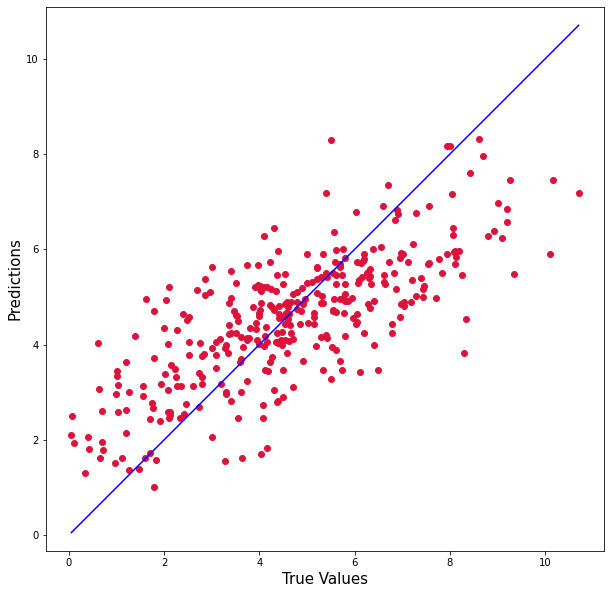

In [146]:
print(r2_train_global, r2_test_global)

plt.figure(figsize=(10,10))
plt.scatter(global_Y_test, predict_test_global, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predict_test_global), max(global_Y_test))
p2 = min(min(predict_test_global), min(global_Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [80]:
print(f"Results for Porphyrins(281) --> Training: {round(r2_train_porph, 2)}, Test: {round(r2_test_porph, 2)}\nComparing to Literature PLS --> Training: 0.70, Test: 0.69")
print(f"\nResults for Triphenyla(229) --> Training: {round(r2_train_triph, 2)}, Test: {round(r2_test_triph, 2)}\nComparing to Literature PLS --> Training: 0.68, Test: 0.62")
print(f"\nResults for Phenothiaz(207) --> Training: {round(r2_train_pheno, 2)}, Test: {round(r2_test_pheno, 2)}\nComparing to Literature PLS --> Training: 0.70, Test: 0.73")
print(f"\nResults for Indolines_(158) --> Training: {round(r2_train_indol, 2)}, Test: {round(r2_test_indol, 2)}\nComparing to Literature PLS --> Training: 0.74, Test: 0.74")
print(f"\nResults for Coumarins_(58_) --> Training: {round(r2_train_couma, 2)}, Test: {round(r2_test_couma, 2)}\nComparing to Literature PLS --> Training: 0.78, Test: 0.68")
print(f"\nResults for Carbazoles(179) --> Training: {round(r2_train_carba, 2)}, Test: {round(r2_test_carba, 2)}\nComparing to Literature PLS --> Training: 0.75, Test: 0.75")
print(f"\nResults for Diphenylam(35_) --> Training: {round(r2_train_diphe, 2)}, Test: {round(r2_test_diphe, 2)}\nComparing to Literature PLS --> Training: 0.88, Test: 0.85")

Results for Porphyrins(281) --> Training: 0.94, Test: 0.72
Comparing to Literature PLS --> Training: 0.70, Test: 0.69

Results for Triphenyla(229) --> Training: 0.92, Test: 0.51
Comparing to Literature PLS --> Training: 0.68, Test: 0.62

Results for Phenothiaz(207) --> Training: 0.93, Test: 0.49
Comparing to Literature PLS --> Training: 0.70, Test: 0.73

Results for Indolines_(158) --> Training: 0.93, Test: 0.63
Comparing to Literature PLS --> Training: 0.74, Test: 0.74

Results for Coumarins_(58_) --> Training: 0.9, Test: 0.47
Comparing to Literature PLS --> Training: 0.78, Test: 0.68

Results for Carbazoles(179) --> Training: 0.94, Test: 0.39
Comparing to Literature PLS --> Training: 0.75, Test: 0.75

Results for Diphenylam(35_) --> Training: 0.96, Test: 0.52
Comparing to Literature PLS --> Training: 0.88, Test: 0.85


In [272]:
# dragon --> remove
# divide at random into training and test x10
# take training build model using RF
# test --> 10 values
# average of r2 and std dev 
# compare 
# feature importance --> using RF
# GA --> training 
# what if I train a mode Kennard-Stone
# get correlation of each 
# optimise hyperparameters via GridSearchCV
# concat all data here
# try random forest on that concatonated data

In [ ]:
porph_X_train_sansCorr, porph_Y_train
triph_X_train_sansCorr, triph_Y_train
pheno_X_train_sansCorr, pheno_Y_train
indol_X_train_sansCorr, indol_Y_train
couma_X_train_sansCorr, couma_Y_train
carba_X_train_sansCorr, carba_Y_train
diphe_X_train_sansCorr, diphe_Y_train

In [88]:
pd.concat([triph_X_train_sansCorr, triph_Y_train], axis = 1).corr()['PCE'].abs().sort_values()

nSpiro      0.000637
H-051       0.000825
C-027       0.002010
C-011       0.003337
B06[O-S]    0.004772
              ...   
F04[N-O]    0.445141
mintN       0.482397
MaxtN       0.482477
B04[N-O]    0.526977
PCE         1.000000
Name: PCE, Length: 748, dtype: float64